In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/praneethvempati/Downloads/cap5771sp25-project/Data/merged_movies_dataset_full.csv')

/var/folders/sp/s913pkds0pl126236zr8b7600000gn/T/ipykernel_22040/3497463589.py:1: DtypeWarning: Columns (2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,22,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/praneethvempati/Downloads/cap5771sp25-project/Data/merged_movies_dataset_full.csv')


In [5]:
pip install sklearn seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/sp/s913pkds0pl126236zr8b7600000gn/T/pip-install-5uu84q8s/sklearn_51c941a30c924645a44ea70baa697fd3/setup.py'"'"'; __file__='"'"'/private/var/folders/sp/s913pkds0pl126236zr8b7600000gn/T/pip-install-5uu84q8s/sklearn_51c941a30c924645a44ea70baa697fd3/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/sp/s913pkds0pl126236zr8b7600000gn/T/pip-pip-egg-info-7ib9zzhb
         cwd: /private/var/folders/sp/s913pkds0pl126236zr8b7600000gn/T/pip-install-5uu84q8s/sklea

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical features
# 'Certificate' and 'original_language' are categorical features
for col in ['Certificate', 'original_language']:
    if col in df.columns:
        df[col] = df[col].astype(str)  # Convert to string to avoid issues
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded '{col}' — Classes: {le.classes_}")
    else:
        print(f"Column '{col}' not found in DataFrame.")



Encoded 'Certificate' — Classes: ['A' 'Approved' 'G' 'GP' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'Passed' 'R'
 'TV-14' 'TV-MA' 'TV-PG' 'U' 'U/A' 'UA' 'Unrated' 'X' 'nan']
Encoded 'original_language' — Classes: ['aa' 'ab' 'af' 'ak' 'am' 'an' 'ar' 'as' 'av' 'ay' 'az' 'ba' 'be' 'bg'
 'bi' 'bm' 'bn' 'bo' 'br' 'bs' 'ca' 'ce' 'ch' 'cn' 'co' 'cr' 'cs' 'cv'
 'cy' 'da' 'de' 'dv' 'dz' 'el' 'en' 'eo' 'es' 'et' 'eu' 'fa' 'ff' 'fi'
 'fj' 'fo' 'fr' 'fy' 'ga' 'gd' 'gl' 'gn' 'gu' 'gv' 'ha' 'he' 'hi' 'hr'
 'ht' 'hu' 'hy' 'hz' 'ia' 'id' 'ie' 'ig' 'ii' 'ik' 'is' 'it' 'iu' 'ja'
 'jv' 'ka' 'kg' 'ki' 'kj' 'kk' 'kl' 'km' 'kn' 'ko' 'ks' 'ku' 'kv' 'kw'
 'ky' 'la' 'lb' 'lg' 'li' 'ln' 'lo' 'lt' 'lv' 'mg' 'mh' 'mi' 'mk' 'ml'
 'mn' 'mo' 'mr' 'ms' 'mt' 'my' 'nb' 'nd' 'ne' 'nl' 'nn' 'no' 'nr' 'nv'
 'ny' 'oc' 'oj' 'om' 'or' 'os' 'pa' 'pi' 'pl' 'ps' 'pt' 'qu' 'rm' 'rn'
 'ro' 'ru' 'rw' 'sa' 'sc' 'sd' 'se' 'sg' 'sh' 'si' 'sk' 'sl' 'sm' 'sn'
 'so' 'sq' 'sr' 'ss' 'st' 'su' 'sv' 'sw' 'ta' 'te' 'tg' 'th' 'ti' 'tk'
 'tl' 'tn' 'to'

In [7]:
target = 'IMDB_Rating'
# Correlation matrix with target
numerical_df = df.select_dtypes(include='number')
correlation = numerical_df.corr()[target].sort_values(ascending=False)

print("Top correlated features with IMDB_Rating:")
print(correlation.drop(target).head(10))  # Exclude self-correlation


Top correlated features with IMDB_Rating:
Meta_score           0.250244
AverageRating        0.174890
vote_count           0.162570
revenue              0.111096
Certificate          0.085950
budget               0.085529
popularity           0.023756
id                   0.012577
runtime              0.007395
original_language   -0.000623
Name: IMDB_Rating, dtype: float64


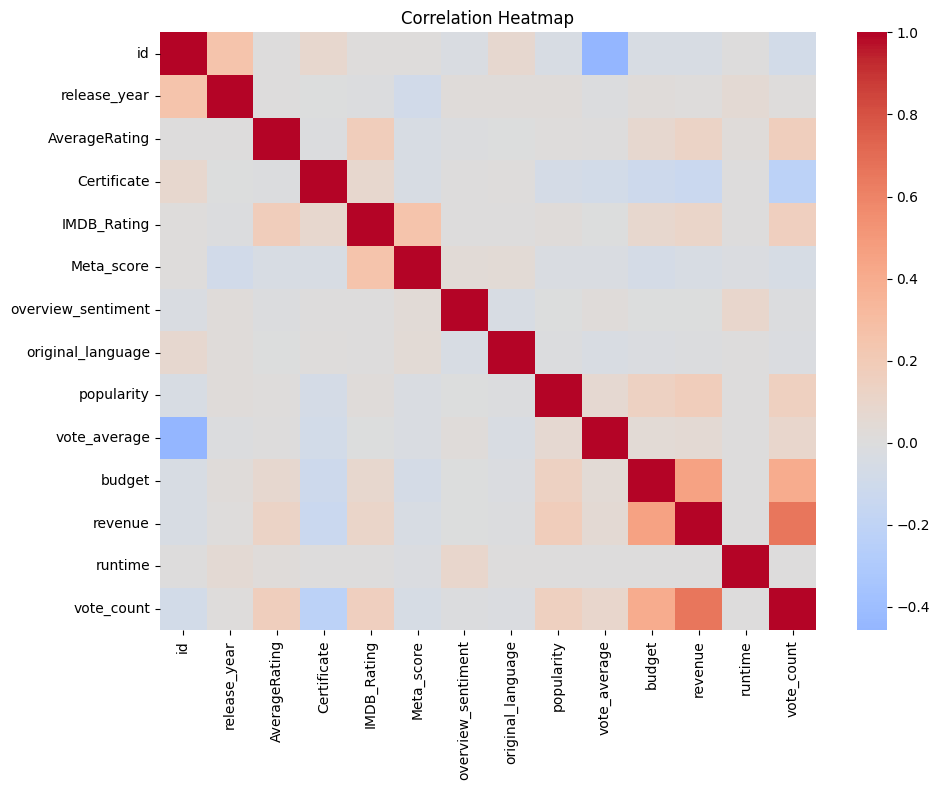

In [8]:
#visualizing the correlation matrix for easy interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Example: convert IMDB_Rating to categories (low/medium/high)
df['rating_category'] = pd.cut(df['IMDB_Rating'], bins=[0, 5.5, 7.0, 10],
                               labels=['Low', 'Medium', 'High'])

# Encode category
label_enc = LabelEncoder()
y_cat = label_enc.fit_transform(df['rating_category'])

# label encoded features
X_cat = df[['Certificate', 'original_language', 'status']]

# Convert to numeric (ensure no string)
X_cat = X_cat.apply(LabelEncoder().fit_transform)

# Chi-square test
chi_scores = chi2(X_cat, y_cat)
chi_df = pd.DataFrame({'Feature': X_cat.columns, 'Chi2 Score': chi_scores[0], 'p-value': chi_scores[1]})
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)

print("Chi-square scores:")
print(chi_df)


Chi-square scores:
             Feature     Chi2 Score   p-value
0        Certificate  172609.738608  0.000000
1  original_language    8358.649176  0.000000
2             status       3.364434  0.338775


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features (excluding the target)
X_numeric = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])

# Fill missing values with column means
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Output results
print(f"Original feature count: {X_numeric.shape[1]}")
print(f"Reduced feature count with PCA: {X_pca.shape[1]}")


Original feature count: 13
Reduced feature count with PCA: 12


/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [12]:
X_full = df.select_dtypes(include='number').copy()
y_full = df['IMDB_Rating']

# Drop missing target rows
valid_idx = y_full.notna()
X = X_full.loc[valid_idx]
y = y_full.loc[valid_idx]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Impute
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [15]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
}

In [17]:
# Train & evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_



Linear Regression
RMSE: 0.0000
R² Score: 1.0000

Decision Tree
RMSE: 0.0040
R² Score: 1.0000

Random Forest
RMSE: 0.0035
R² Score: 1.0000

Support Vector Machine
RMSE: 0.1003
R² Score: 0.9890


/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



Neural Network (MLP)
RMSE: 0.0485
R² Score: 0.9974


/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [18]:
# List numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Peek at the data types and unique value counts
for col in numeric_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


Numeric columns: ['id', 'release_year', 'AverageRating', 'Certificate', 'IMDB_Rating', 'Meta_score', 'overview_sentiment', 'original_language', 'popularity', 'vote_average', 'budget', 'revenue', 'runtime', 'vote_count']
id: 1188909 unique values
release_year: 163 unique values
AverageRating: 68 unique values
Certificate: 19 unique values
IMDB_Rating: 73 unique values
Meta_score: 61 unique values
overview_sentiment: 70469 unique values
original_language: 175 unique values
popularity: 21701 unique values
vote_average: 3494 unique values
budget: 5827 unique values
revenue: 13992 unique values
runtime: 775 unique values
vote_count: 3547 unique values


In [19]:
# Convert continuous ratings to categories
df['rating_class'] = pd.cut(df['IMDB_Rating'],
                            bins=[0, 5.5, 7.0, 10],
                            labels=['Low', 'Medium', 'High'])


In [20]:
from sklearn.model_selection import train_test_split

# Use numeric features
X = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])
y = df['rating_class']

# Drop missing targets
valid_idx = y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6406225436252162
Precision: 0.6346191704517349
Recall: 0.6406225436252162
F1 Score: 0.5931376177113193

Classification Report:

              precision    recall  f1-score   support

        High       0.73      0.47      0.57      2055
         Low       0.46      0.07      0.12       926
      Medium       0.62      0.90      0.74      3380

    accuracy                           0.64      6361
   macro avg       0.61      0.48      0.48      6361
weighted avg       0.63      0.64      0.59      6361



/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarni

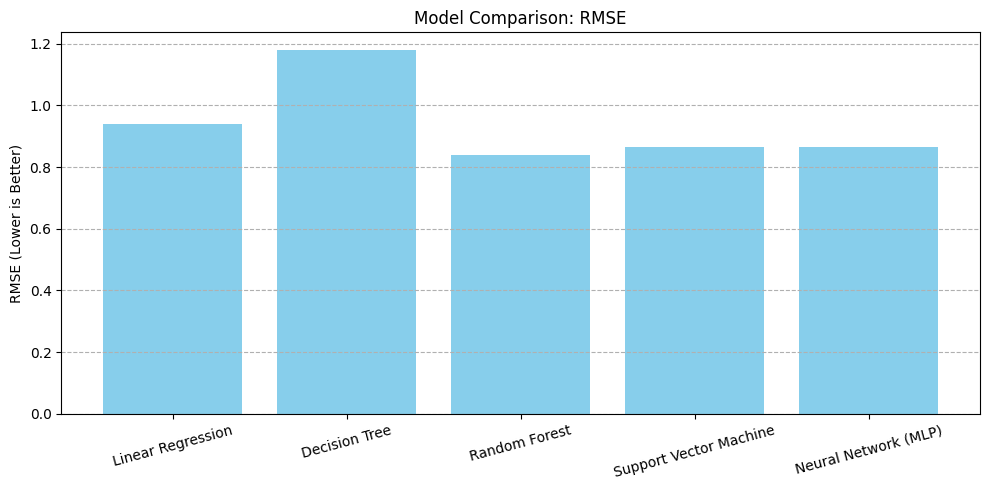

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select numeric features and target
X = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])
y = df['IMDB_Rating'].dropna()

# Align features to y
X = X.loc[y.index]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
}

# Store results
model_names = []
rmse_scores = []
r2_scores = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    model_names.append(name)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# --- Plot RMSE ---
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



In [23]:
# Convert y_test to binary: 1 if 'High', else 0
y_test_binary = (y_test == 'High').astype(int)

# Get probabilities for the 'High' class
high_class_index = list(clf.classes_).index('High')
y_probs_binary = clf.predict_proba(X_test)[:, high_class_index]


/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


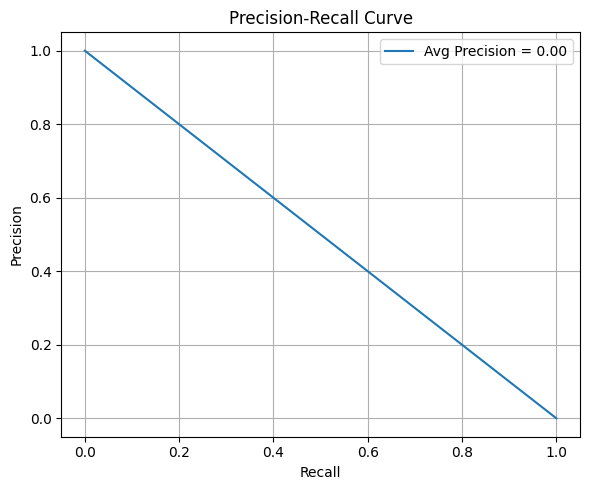

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall points
precision, recall, _ = precision_recall_curve(y_test_binary, y_probs_binary)
ap_score = average_precision_score(y_test_binary, y_probs_binary)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'Avg Precision = {ap_score:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Suppose original column was IMDb score or some rating column
y_train = (y_train >= 7.0).astype(int)  # 1 = high rating, 0 = low rating
y_test = (y_test >= 7.0).astype(int)


In [26]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/praneethvempati/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  g

LogisticRegression(max_iter=1000)

In [27]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
svr_model = SVR()
mlp_model = MLPRegressor()


In [28]:
import joblib

# Save datasets
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")

# Save all trained models
joblib.dump(lr_model, "linear_model.pkl")
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(svr_model, "svr_model.pkl")
joblib.dump(mlp_model, "mlp_model.pkl")

print("✅ All regression models and data splits saved!")


✅ All regression models and data splits saved!


In [29]:
import joblib

# Save data splits
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")

# Save models
joblib.dump(lr_model, "linear_model.pkl")
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(svr_model, "svr_model.pkl")
joblib.dump(mlp_model, "mlp_model.pkl")

print("✅ Models and data splits saved successfully!")


✅ Models and data splits saved successfully!


In [30]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Step 2: Prepare text and regression target
X_full = df['overview'].astype(str)
y_full = df['overview_sentiment']

# Drop rows with missing values
mask = y_full.notnull()
X_full = X_full[mask]
y_full = y_full[mask]



In [32]:
# Step 3: Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42)



In [33]:
# Step 4: Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

#joblib.dump(vectorizer, 'C:/Users/nilas/cap5771sp25-project/script/vectorizer.pkl')



In [34]:
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train_vec, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [35]:

# Step 6: Save artifacts
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(X_test_text, 'X_test_text.pkl')
joblib.dump(y_test, 'y_test.pkl')


['y_test.pkl']

In [36]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Reload correct model
model = joblib.load('random_forest_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Predict again
y_pred = model.predict(X_train_vec)


In [38]:
joblib.dump(X_train_text, 'X_train_text.pkl')


['X_train_text.pkl']

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_pred_train = model.predict(X_train_vec)
# mae = mean_absolute_error(y_train, y_pred_train)
# rmse = mean_squared_error(y_train, y_pred_train, squared=False)
# r2 = r2_score(y_train, y_pred_train)

# print(f"MAE: {mae:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R² Score: {r2:.4f}")
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor  # Assuming you're still using this

# Step 1: Load your saved training text, labels, and model
X_train_text = joblib.load('X_train_text.pkl')
y_train = joblib.load('y_train.pkl')
model = joblib.load('random_forest_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Step 2: Ensure consistent data for prediction
# If X_train_text contains only a subset, use the corresponding subset of y_train
X_train_vec = vectorizer.transform(X_train_text) # Vectorize the loaded text data

# If the original `y_train` was larger, make sure it matches the current prediction set
if len(y_train) != X_train_vec.shape[0]:
    y_train = y_train[:X_train_vec.shape[0]]  # Adjust to match size of predictions

# Step 3: Make predictions on consistent data
y_pred = model.predict(X_train_vec) # Predict on vectorized train data


# Evaluation (keep as is)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [25440, 906296]